# Exploratory Data Analysis of Car Features
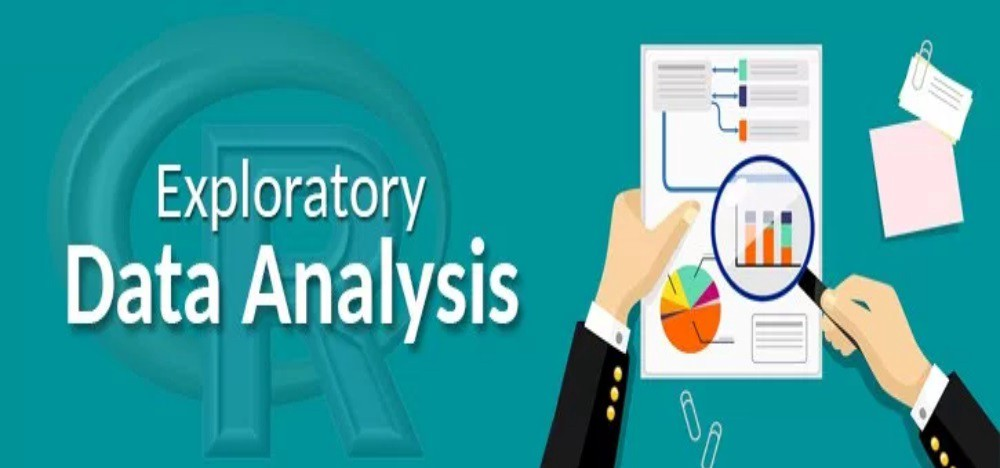

**Table of contents**
    

          1.  Data set analysis
                1.1 Importing necessary libraries
                1.2 Uploding dataset file of car data set from kaggle
                1.3 Loading car dataset
                1.4 Checking shape of the data
                1.5 Checking information of the data
                1.6 Checking the data type
                1.7 Statistical summary
                1.8 Checking for the null values


          2. Checking the data set
                2.1 Checking for irrelevant columns in dataset and dropping them
                
          3. Analysis Of columns
                3.1 Renaming the columns
          
          4. Data cleansing
                4.1 Checking for duplicate row
                4.2 Dropping the duplicate data
                4.3 Checking for null values and dropping them
              
          5. Detecting Outliers
              5.1 outliers in various columns and removing it from datasets
              5.2 Removing outlier using interquartile range method
              
          6. Car brand analysis
              6.1 Most represented car brands in dataset and average price among the top car brands
            
          7. Correlation Matrix

          8. EDA on car data set
              8.1 Average Prices Of Car Per Year
              8.2 Number of cars distrubted per year
              8.3  How are other features correlated to the manufacturer's suggested retail price (MSRP)?
              8.4 Most Popular Car Brands
              8.5 What are the Vehicle Styles out there and which ones are considered to contribute more to the manufacturer's suggested Price?
              8.6 Pie chart of transmission type
            
          9. Building ML model

          10. Testing Different Algorithms
          
              

# Step1

**1.1 -Importing necessary libraries**

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns #for data visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
#using plotly library to plot interactive graph
import plotly.graph_objects as go 
import plotly.express as px
from plotly.subplots import make_subplots





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**1.2 -Uploding dataset file of car data set from kaggle**

In [ ]:
#uploading dataset file
from google.colab import files
uploaded = files.upload()


Saving data.csv to data.csv


**1.3 -Loading car data set**

In [ ]:
#loading car dataset file
import io
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df.head(5)     #checking the top 5 data from the dataset



,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
#checking last 5 data set
df.tail(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920
11913,Lincoln,Zephyr,2006,regular unleaded,221.0,6.0,AUTOMATIC,front wheel drive,4.0,Luxury,Midsize,Sedan,26,17,61,28995


**1.4 -Checking shape of the data**

In [ ]:
df.shape #checking the shape of the data

(11914, 16)

**1.5  -Checking information of the data**

In [ ]:
df.info() #checking the information of data do irrelevant data can be removed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

**1.6 -Checking the data type**

In [ ]:
df.dtypes #checking the data type of all the columns

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

**1.7 -statistical summary**

In [ ]:
df.describe() # checking the statistical summary so that data can be analyse

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


**1.8 -Checking for the null values**

In [ ]:
null_values=df.isnull()
null_values.sum() # checking total number of null values so that data can be known

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

# Step 2

**2.1 - Checking for irrelevant columns in dataset and dropping them**

---



In [ ]:
# removing irrelevant data so that data predication can be accurate

#dropping 'Number Of Doors ','Market Category' because as the standard deviation of Number Of Doors is 0.881315 and in Market Category there are maimum number of null values so dropping these two column will not affect data predication
df=df.drop(['Number of Doors','Market Category'],axis=1)
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.shape #checking shape of columns to confirm the dropping of colmns

(11914, 14)

In [ ]:
df.info()  #checking information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Vehicle Size       11914 non-null  object 
 9   Vehicle Style      11914 non-null  object 
 10  highway MPG        11914 non-null  int64  
 11  city mpg           11914 non-null  int64  
 12  Popularity         11914 non-null  int64  
 13  MSRP               11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


# Step 3



**3.1 -Renaming the columns**

In [ ]:
#renaming column as required 
df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','Transmission Type':'Transmission','"Driven_Wheels':'Drive Mode','highway MPG':'MPG-H','city mpg':'MPG-C','MSRP':'Price'},inplace=True)
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Driven_Wheels,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              11914 non-null  object 
 1   Model             11914 non-null  object 
 2   Year              11914 non-null  int64  
 3   Engine Fuel Type  11911 non-null  object 
 4   HP                11845 non-null  float64
 5   Cylinders         11884 non-null  float64
 6   Transmission      11914 non-null  object 
 7   Driven_Wheels     11914 non-null  object 
 8   Vehicle Size      11914 non-null  object 
 9   Vehicle Style     11914 non-null  object 
 10  MPG-H             11914 non-null  int64  
 11  MPG-C             11914 non-null  int64  
 12  Popularity        11914 non-null  int64  
 13  Price             11914 non-null  int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1.3+ MB


# Step 4

In [ ]:
df.shape  #checking the shape of the data

(11914, 14)

**4.1 - checking for duplicate row**

In [ ]:
duplicate_row_data=df[df.duplicated()]
duplicate_row_data.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Driven_Wheels,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
14,BMW,1 Series,2013,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,19,3916,31500
18,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
20,Audi,100,1992,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
24,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000
25,Audi,100,1993,regular unleaded,172.0,6.0,MANUAL,front wheel drive,Midsize,Sedan,24,17,3105,2000


In [ ]:
duplicate_row_data.shape # number of duplicate data in data set

(721, 14)

**4.2 -Dropping the duplicate data**

In [ ]:
df=df.drop_duplicates() #dropping duplicate data in dataset
df.head()

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Driven_Wheels,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


In [ ]:
df.shape

(11193, 14)

**4.3 -Checking for null values and dropping them**

In [ ]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     3
HP                  69
Cylinders           30
Transmission         0
Driven_Wheels        0
Vehicle Size         0
Vehicle Style        0
MPG-H                0
MPG-C                0
Popularity           0
Price                0
dtype: int64

In [ ]:
df=df.dropna()
df.count()

Make                11092
Model               11092
Year                11092
Engine Fuel Type    11092
HP                  11092
Cylinders           11092
Transmission        11092
Driven_Wheels       11092
Vehicle Size        11092
Vehicle Style       11092
MPG-H               11092
MPG-C               11092
Popularity          11092
Price               11092
dtype: int64

In [ ]:
df.isnull().sum()

Make                0
Model               0
Year                0
Engine Fuel Type    0
HP                  0
Cylinders           0
Transmission        0
Driven_Wheels       0
Vehicle Size        0
Vehicle Style       0
MPG-H               0
MPG-C               0
Popularity          0
Price               0
dtype: int64

In [ ]:
df.shape

(11092, 14)

# Step 5



**5.1 -Checking for outliers in various columns and removing those datasets**

In [ ]:
df.head(5)

,Make,Model,Year,Engine Fuel Type,HP,Cylinders,Transmission,Driven_Wheels,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,Compact,Convertible,28,18,3916,34500


Plotting the graph having outlier by plotting the boxplot graph.

Text(0.5, 1.0, 'BoxPlot with outlier')

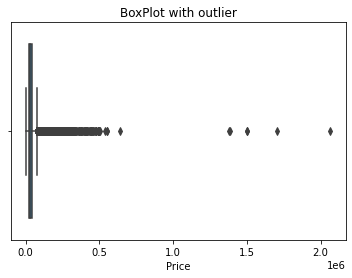

In [ ]:
sns.boxplot(x=df['Price']).set_title('BoxPlot with outlier')

Text(0.5, 1.0, 'BoxPlot with outlier')

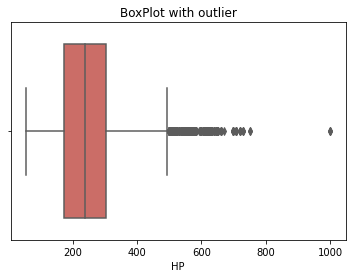

In [ ]:
sns.boxplot(x=df['HP'],palette='hls').set_title('BoxPlot with outlier')

Text(0.5, 1.0, 'BoxPlot with outlier')

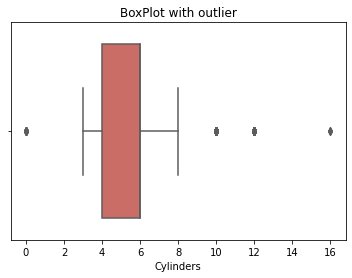

In [ ]:
sns.boxplot(x=df['Cylinders'],palette='hls').set_title('BoxPlot with outlier')

Text(0.5, 1.0, 'BoxPlot with outlier')

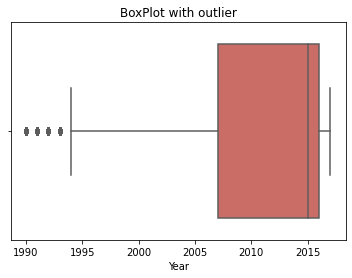

In [ ]:
sns.boxplot(x=df['Year'],palette='hls').set_title('BoxPlot with outlier')

Outlier is an observation that lies an abnormal distance from other values in a random sample from a population.Above all graphs show the boxplot in which the scatter dots are outlier in the data set.

**Step 5.2 -Removing outlier using interquartile range method**



In [ ]:
Q1 = df.quantile(0.25)   # Q1 is the "middle" value in the first half of the rank-ordered data set.
Q3 = df.quantile(0.75)   #Q3is the "middle" value in the second half of the rank-ordered data set.
IQR = Q3 - Q1            #It is the interquartile range
print(IQR)

Year              9.00
HP              131.00
Cylinders         2.00
MPG-H             8.00
MPG-C             6.00
Popularity     1460.00
Price         21491.25
dtype: float64


In [ ]:
lower_limit=Q1-(1.5*IQR)    #define the minimum range points that can be in dataset
print(lower_limit)

Year           1993.500
HP              -24.500
Cylinders         1.000
MPG-H            10.000
MPG-C             7.000
Popularity    -1641.000
Price        -10696.875
dtype: float64


In [ ]:
upper_limit=Q3+(1.5*IQR)    #define the maximum range points that can be in the dataset
print(upper_limit)

Year           2029.500
HP              499.500
Cylinders         9.000
MPG-H            42.000
MPG-C            31.000
Popularity     4199.000
Price         75268.125
dtype: float64


In [ ]:
df = df[~((df < lower_limit) |(df > upper_limit)).any(axis=1)]
df.shape

(8608, 14)

Plotting the graph after removing outlier

Text(0.5, 1.0, 'After removing outlier')

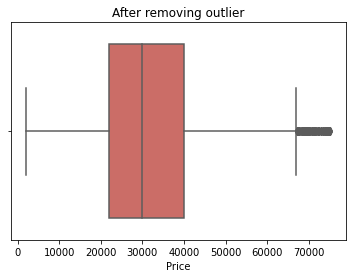

In [ ]:
sns.boxplot(x=df['Price'],palette='hls').set_title('After removing outlier')

Text(0.5, 1.0, 'After removing outlier')

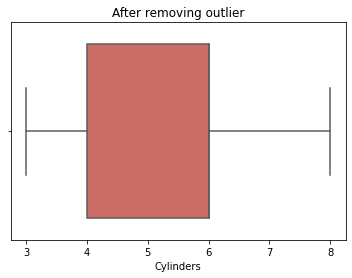

In [ ]:
sns.boxplot(x=df['Cylinders'],palette='hls').set_title('After removing outlier')

Text(0.5, 1.0, 'After removing outlier')

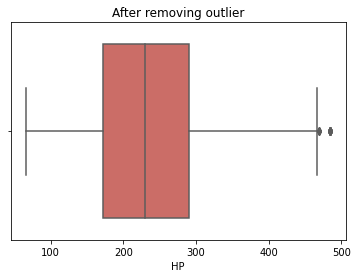

In [ ]:
sns.boxplot(x=df['HP'],palette='hls').set_title('After removing outlier')

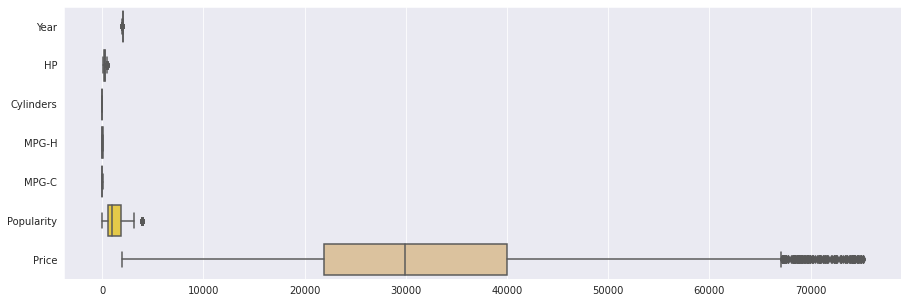

In [ ]:
sns.boxplot(data=df,orient='h',palette='Set2')

From the above graph after removing outlier comparing it with the previous graph before removing outliers the difference can clearly seen.

# Step 6



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8608 entries, 0 to 11913
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Make              8608 non-null   object 
 1   Model             8608 non-null   object 
 2   Year              8608 non-null   int64  
 3   Engine Fuel Type  8608 non-null   object 
 4   HP                8608 non-null   float64
 5   Cylinders         8608 non-null   float64
 6   Transmission      8608 non-null   object 
 7   Driven_Wheels     8608 non-null   object 
 8   Vehicle Size      8608 non-null   object 
 9   Vehicle Style     8608 non-null   object 
 10  MPG-H             8608 non-null   int64  
 11  MPG-C             8608 non-null   int64  
 12  Popularity        8608 non-null   int64  
 13  Price             8608 non-null   int64  
dtypes: float64(2), int64(5), object(7)
memory usage: 1008.8+ KB


**Step 6.1 -Most represented car brands in dataset and average price among the top car brands**

 

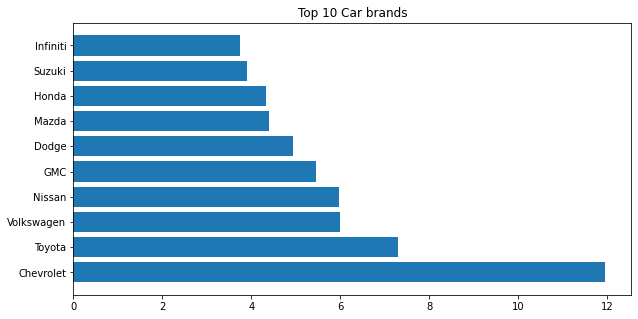

In [ ]:
#counting of car per brand
counts=df['Make'].value_counts()*100/sum(df['Make'].value_counts())

#Finding top 10 car brands
popular_brand=counts.index[:10]

#Plotting the graph
plt.figure(figsize=(10,5))
plt.barh(popular_brand, width=counts[:10])
plt.title('Top 10 Car brands')
plt.show()

 Visualizing data in pie chart  of top 10 car brands

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



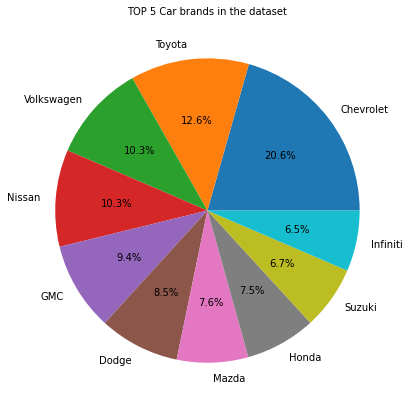

In [ ]:
top_car=df['Make'].value_counts().head(10).to_frame()
m= top_car.style.background_gradient(cmap='Blues')
labels= ['Chevrolet','Toyota','Volkswagen','Nissan','GMC','Dodge','Mazda','Honda','Suzuki','Infiniti']
explode=[0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
values=df['Make'].value_counts().head(10).to_frame()

#visualization
plt.figure(figsize=(7,7))
plt.pie(values,explode=None,labels=labels,autopct='%1.1f%%')
plt.title('TOP 5 Car brands in the dataset',color='black',fontsize=10)
plt.show()

Finding average price of top 10 car brand

In [ ]:
prices = df[['Make','Price']].loc[(df['Make'] == 'Chevrolet')|
               (df['Make'] == 'Ford')|
               (df['Make'] == 'Volkswagen')|
               (df['Make'] == 'Toyota')|
               (df['Make'] == 'Dodge')|
               (df['Make'] == 'Nissan')|
               (df['Make'] == 'GMC')|
               (df['Make'] == 'Honda')|
               (df['Make'] == 'Mazda')].groupby('Make').mean()
print(prices)

                   Price
Make                    
Chevrolet   28188.626459
Dodge       26076.722353
GMC         33261.400853
Honda       27381.364611
Mazda       20495.820106
Nissan      28352.543860
Toyota      29011.750397
Volkswagen  29032.817476


Comparision of average prices of top 10 car brands

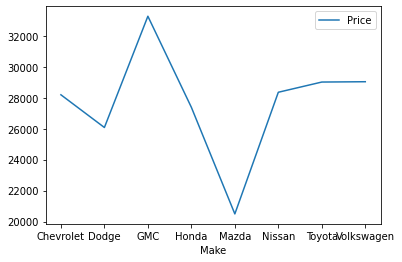

In [ ]:
prices.plot()
plt.show()

# **Step 7**

**Plotting correlation matrix**

In [ ]:
df.corr()

,Year,HP,Cylinders,MPG-H,MPG-C,Popularity,Price
Year,1.000000,0.330540,-0.094397,0.359829,0.323613,0.204453,0.591644
HP,0.330540,1.000000,0.741031,-0.465311,-0.563362,0.105691,0.743497
Cylinders,-0.094397,0.741031,1.000000,-0.697884,-0.750850,0.025803,0.392174
MPG-H,0.359829,-0.465311,-0.697884,1.000000,0.937936,0.080857,-0.127772
MPG-C,0.323613,-0.563362,-0.750850,0.937936,1.000000,0.070320,-0.202410
Popularity,0.204453,0.105691,0.025803,0.080857,0.070320,1.000000,0.116684
Price,0.591644,0.743497,0.392174,-0.127772,-0.202410,0.116684,1.000000


**There is a positive correlation between:**

*   Engine HP and Engine Cylinders
*   Engine HP and the retail price
*   Engine Cylinders and  retail price




**High anticorrelation**

- Engine cylinders & highway mpg(MPG-H)

Plotting heat map of correlation so that relation can easily be defined

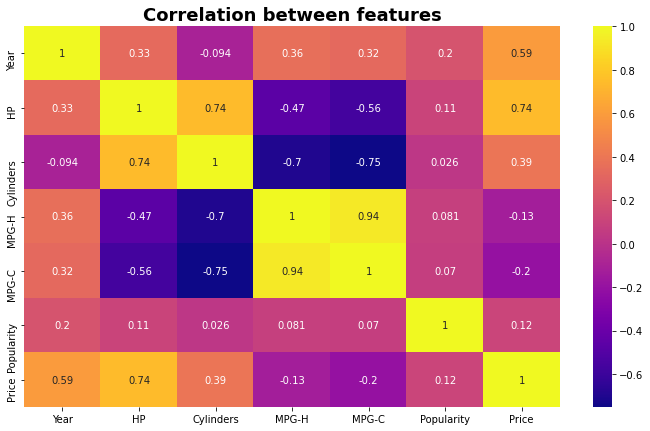

In [ ]:
car_corr=df.corr()

plot=plt.subplots(figsize=(12,7))
sns.heatmap(car_corr, cmap='plasma',annot=True)
plt.title("Correlation between features", 
          weight='bold', 
          fontsize=18)
plt.show()

Plotting the graph to understand better correlation between different features of dataset


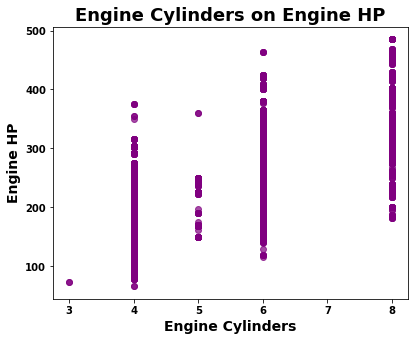

In [ ]:
plt.figure(figsize=(14,5))
ax1 = plt.subplot2grid((1,2),(0,0))
plt.scatter(x=df['Cylinders'], y=df['HP'], color='purple', alpha=0.7)
plt.title('Engine Cylinders on Engine HP', weight='bold', fontsize=18)
plt.xlabel('Engine Cylinders', weight='bold',fontsize=14)
plt.ylabel('Engine HP', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')


plt.show()

From above heat map and graph we can conclude that ,an engine with more cylinders produces more power, and more power means a high MSRP

# Step 8
Performing EDA and plotting garphs

**8.1 Average Prices Of Car Per Year**

In [ ]:
# Construct data
index = df.groupby(['Year']).mean()['Price'].index.tolist()
mean_prices = df.groupby(['Year']).mean()['Price'].values.tolist()
std_prices = df.groupby(['Year']).std()['Price'].values.tolist()

# Data that will be used
price_per_year = pd.DataFrame(np.column_stack((mean_prices, std_prices)), columns=['Mean', 'Std'], index=index)

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=index, y=price_per_year.Mean,
                    mode='markers',
                    name='Mean Price'))

fig.add_trace(go.Scatter(x=index, y=price_per_year.Std,
                    mode='markers',
                    name='Std Price'))

fig.update_layout(title="Average MSRP per Year",
                  xaxis_title="Year",
                  yaxis_title="MSRP")

fig.show()

The following graph shows the average Prices(MSRP) per year. Between the 1990s and 2000, prices are concentrated around 2000 USD. They are much more variable from 2000 onwards. There is an extremely high variance in 2008, the year in which the most expensive car on the market was sold. In the years with very high variances, there are systematically very expensive cars sold, in contrast to a large majority of vehicles with average prices.

**8.2 Number of cars distrubted per year**

In [ ]:
# Create index
dic = {1995+i : sum(df['Year']==1995+i) for i in range(28)}
x_dic = [1995 + i for i in range(28)]
y_dic = [dic[1995 + i] for i in range(28)]

# Plot
fig = go.Figure([go.Bar(x=x_dic, y=y_dic)])

fig.update_layout(title="Car year distribution",
                  xaxis_title="Year",
                  yaxis_title="Count Cars sold")


fig.show()

From above garph it can be observed that maximum number of car are sold in the year after 2015

**8.3 How are other features correlated to the manufacturer's suggested retail price (MSRP)?**

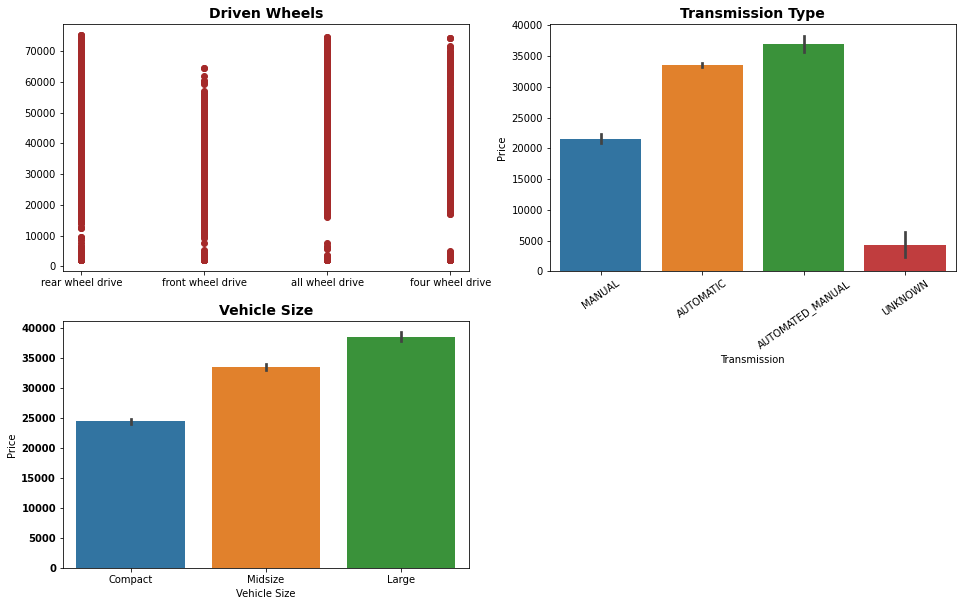

In [ ]:
fig= plt.figure(figsize=(16,10))

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 0))
plt.scatter(x=df['Driven_Wheels'], y=df['Price'], color='Brown')
plt.title('Driven Wheels', weight='bold', fontsize=14)



#Second row first column

ax1 = plt.subplot2grid((2,2), (0, 1))
sns.barplot(x=df['Transmission'], y=df['Price'])
plt.xticks(rotation=35)
plt.title('Transmission Type', weight='bold', fontsize=14)


#second row second column
ax1 = plt.subplot2grid((2,2), (1, 0))
sns.barplot(x=df['Vehicle Size'], y=df['Price'])

plt.yticks(weight='bold')
plt.title('Vehicle Size', weight='bold', fontsize=14)


plt.show()

From above graphs manufacturer can conclude that by including which feature in car they will get the maximum retail price (MSRP) from their products.For example,

*   Vehicle Size: Large Size

*   Transmission Type: Automated-Manual (It consists of a conventional manual transmission with an electronically-controlled hydraulic clutch and computerized gear shift control, and the driver can usually override the computer control with a clutchless "manual" mode.)




**8.4 Most Popular Car Brands**

In [ ]:
# Plot
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['Make'].unique(),
    y=df.groupby(['Make']).mean()['Popularity'],
    marker_color='indianred'
))

fig.update_layout(xaxis_tickangle=-50,
                  title_text='Popularity of different car brands',
                  xaxis_title="Car Brand",
                  yaxis_title="Popularity")
fig.show()

On this graph, we can see that Fiat, Chrysler  are the most liked car. 

**8.5 - What are the Vehicle Styles out there and which ones are considered to contribute more to the manufacturer's suggested retail price (MSRP)?**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

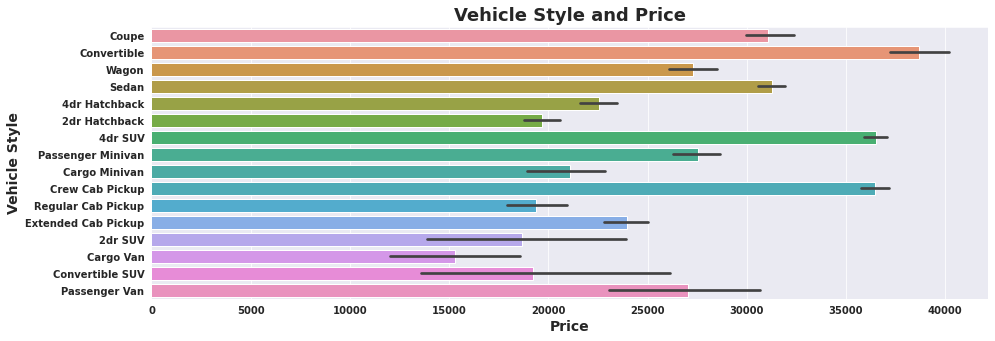

In [ ]:
sns.set({'figure.figsize':(15,5)})
VS=sns.barplot(x=df['Price'], y=df['Vehicle Style'])
plt.title('Vehicle Style and Price', weight='bold', fontsize=18)
plt.xlabel('Price', weight='bold',fontsize=14)
plt.ylabel('Vehicle Style', weight='bold', fontsize=14)
plt.xticks(weight='bold')
plt.yticks(weight='bold')



*   Coupe, Convertible, 4dr SUV and Sedan styles : Make the model worth more in terms of the manufacturer's suggested retail price (MSRP)
*   2 dr Suv, Cargo Van, Convertible SUV and 2 dr Hatchback : Make the model worth less in terms of the manufacturer's suggested retail price (MSRP)



**8.6 Pie chart of transmission type**


In [ ]:
# Get data
data_pie = df['Transmission'].value_counts()

# Plot
fig = go.Figure(data=[go.Pie(labels=data_pie.index, values=data_pie.tolist(), textinfo='label+percent'
                            )])

fig.update_traces(hole=.3, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Pie chart of transmission type")

fig.show()

Almost 75% of cars are automatic. For decades automatic transmission have been considered much more convenient in the USA than in Europe.

# Step 9
**Bulding ML Model**

In [ ]:
# building ML model with target as price value
X = df[['Popularity', 'Year', 'HP', 'Cylinders', 'MPG-H', 'MPG-C']].values  
y = df['Price'].values

StandardScaler is that it will transform your data such that its distribution will have a mean value 0 and standard deviation of 1

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
#Splitting dataset into train set and test test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#checking the train data
len(X_train)

6886

In [ ]:
len(X_test)  #test size to be 20% of the data set

1722

In [ ]:
#model building
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[0.00254823]
[[-0.02922657  0.34663221  0.7117705  -0.0767351   0.00802135  0.02258658]]


In [ ]:
#predicted values for X_test 
regressor.predict(X_test)

array([[-0.13037525],
       [ 1.26287018],
       [ 0.18052321],
       ...,
       [ 0.88585254],
       [-1.48032172],
       [-0.61461156]])

In [ ]:
#checking the accuracy of the data
regressor.score(X_test,y_test)

0.6551590204243145

The above score indicates that the accuracy is 65%

In [ ]:
# Predicting the Test set results
y_test_predict = regressor.predict(X_test)
print(y_test_predict)
y_train_predict= regressor.predict(X_train)
y_train_predict




[[-0.13037525]
 [ 1.26287018]
 [ 0.18052321]
 ...
 [ 0.88585254]
 [-1.48032172]
 [-0.61461156]]


array([[ 1.23218112],
       [-0.99922455],
       [ 0.60959571],
       ...,
       [-0.79442216],
       [-0.21546288],
       [ 0.85987368]])

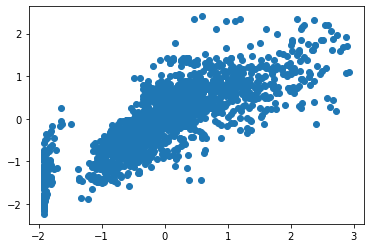

In [ ]:
#plotting the graph
plt.scatter(y_test,y_test_predict)

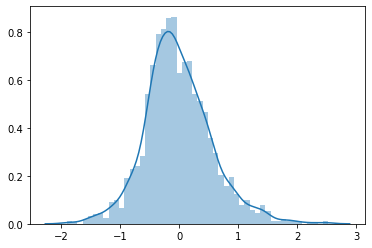

In [ ]:
sns.distplot((y_test-y_test_predict),bins=50)

In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_predict))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))
print('R2 Score:', metrics.r2_score(y_test, y_test_predict))

Mean Absolute Error: 0.43692723571675884
Root Mean Squared Error: 0.5721827741248074
R2 Score: 0.6551590204243145


# Step 10
**Testing Different Algorithm**

**Polynomial Regression**

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

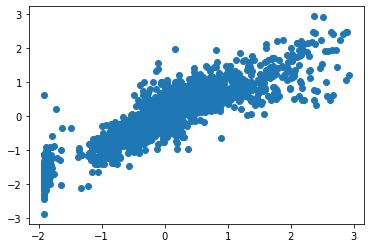

In [ ]:
# Predicting a new result with Polynomial Regression
y_pred=lin_reg_2.predict(poly_reg.fit_transform(X_test))
plt.scatter(y_test,y_pred)

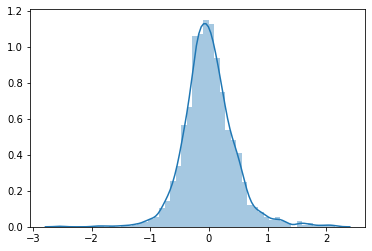

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.3180120308437957
Root Mean Squared Error: 0.4375072886040853
R2 Score: 0.7983863662556718


**OLS ( Ordinary Least-Squares)**

In [ ]:
import statsmodels.api as sm

x_train = sm.add_constant(X_train)
model = sm.OLS(y_train, x_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     2655.
Date:                Sun, 23 Aug 2020   Prob (F-statistic):               0.00
Time:                        16:40:14   Log-Likelihood:                -5686.9
No. Observations:                6886   AIC:                         1.139e+04
Df Residuals:                    6879   BIC:                         1.144e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.007      0.382      0.702      -0.011       0.016
x1            -0.0292      0.007     -4.307      0.000      -0.043      -0.016
x2             0.3466      0.010     35.736      0.000       0.328       0.366
x3             0.7118      0.013     53.187      0.000       0.686       0.738
x4            -0.0767      0.013     -5.976      0.000      -0.102      -0.052
x5             0.0080      0.020      0.405      0.685      -0.031       0.047
x6             0.0226      0.022      1.034      0.301      -0.020       0.065
==============================================================================
Omnibus:                      439.651   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.790
Skew:                           0.503   Prob(JB):                    5.56e-159
Kurtosis:                       4.236   Cond. No.                         7.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#predicting new result
y_pred = regressor.predict(X_test)

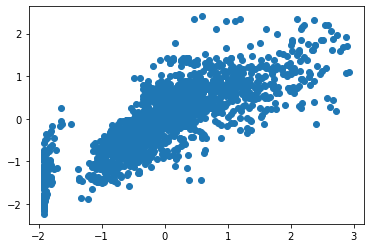

In [ ]:
plt.scatter(y_test,y_pred)

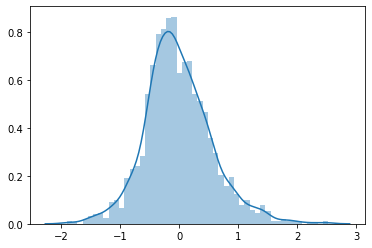

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.43692723571675884
Root Mean Squared Error: 0.5721827741248074
R2 Score: 0.6551590204243145


**Support Vector Regression (SVR)**

In [ ]:
# Fitting SVR to the dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

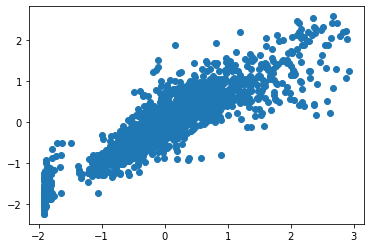

In [ ]:
# Predicting a new result
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

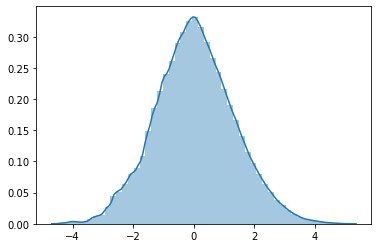

In [ ]:
sns.distplot((y_test-y_pred),bins=50)

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.2990436407411569
Root Mean Squared Error: 0.42507973343011946
R2 Score: 0.809677509881873


In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# predicting a new value 
y_pred1 = regr_1.predict(X_test)
y_pred2 = regr_2.predict(X_test)

In [ ]:
# print the predicted price 
print('Value for max depth 4 =',y_pred1) 
print('Value for max depth 5 =',y_pred2)

Value for max depth 4 = [-0.24354935  1.22613338  0.74401297 ...  1.22613338 -0.9696328
 -0.67442523]
Value for max depth 5 = [-0.38821918  1.33877677  0.66270873 ...  1.02810732 -0.98580514
 -0.60811373]


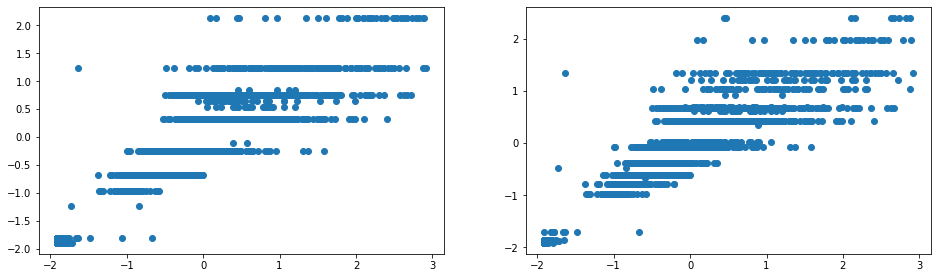

In [ ]:
fig= plt.figure(figsize=(16,10))

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 0))
plt.scatter(y_test,y_pred1)


#Second row first column
ax1 = plt.subplot2grid((2,2), (0, 1))
plt.scatter(y_test,y_pred2)



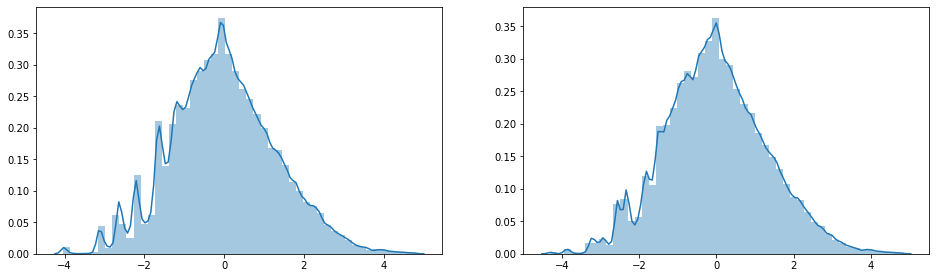

In [ ]:
fig= plt.figure(figsize=(16,10))

#first row sec col
ax1 = plt.subplot2grid((2,2), (0, 0))
sns.distplot((y_test-y_pred1),bins=50)


#Second row first column
ax1 = plt.subplot2grid((2,2), (0, 1))
sns.distplot((y_test-y_pred2),bins=50)


In [ ]:
#predicting for the first value
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R2 Score:', metrics.r2_score(y_test, y_pred1))

Mean Absolute Error: 0.3425981367366733
Root Mean Squared Error: 0.4817236725769323
R2 Score: 0.7555751881923647


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print('R2 Score:', metrics.r2_score(y_test, y_pred2))

Mean Absolute Error: 0.3255733898369397
Root Mean Squared Error: 0.4610066530613315
R2 Score: 0.7761465984246485


**Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

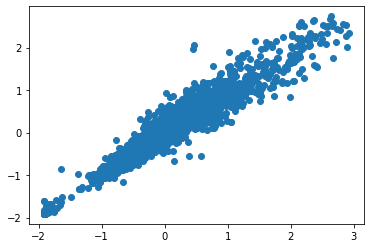

In [ ]:
y_pred = regressor.predict(X_test)
plt.scatter(y_test,y_pred)

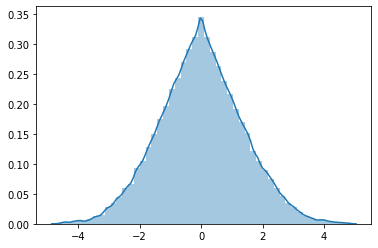

In [ ]:
sns.distplot((y_test-y_pred),bins=50)


In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.18004945383601353
Root Mean Squared Error: 0.25338258147380277
R2 Score: 0.9323756934002008


**From above all algorithm we can conclude that Support Vector Regression and Random Forest Regression fits well for the dataset.**